In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

**Extra Credit**

If you know how to estimate simple regressions, this one's for you! On *bcourses* you'll find two files, `happydata.txt` and `codebook.txt`. The former contains variables called `HAPPY`, `REALINC`, and `REGION`.  Download these.

- Estimate the mean values of `HAPPY` and `REALINC` by region.  Discuss. (Note: you will want to ignore any values for these variables which indicate different missing codes; see the codebook).

- Consider a simple regression of the form:


 $\mbox{HAPPY}_i= \alpha + \beta\log(\mbox{REALINC}) + \epsilon_i$

where the subscripts $i$ indicates the value of the variable for the $i$th observation, and $\mbox{HAPPY}_i$ takes the value 1 if the respondent is "Very happy", and zero otherwise. Estimate the regression.  How would you interpret your estimates of the coefficients?

- Try estimating the previous regression again, but replace the constant term with a set of dummy variables for the different regions. Interpret your results.

---

First let's read in the data:

In [57]:
happy_data = pd.read_csv("data/happydata.csv")
happy_data

,CASEID,YEAR,REGION,HAPPY,REALINC
0,1,1972,3,3,18951
1,2,1972,3,3,24366
2,3,1972,3,2,24366
3,4,1972,3,3,30458
4,5,1972,3,2,50763
5,6,1972,3,2,43994
6,7,1972,3,3,37226
7,8,1972,3,3,13537
8,9,1972,7,2,2707
9,10,1972,7,2,18951


As per directions, we'll drop responses for `HAPPY` that should not factor into our analysis:

In [59]:
happy_data = happy_data[happy_data["HAPPY"] != 8] # Don't know
happy_data = happy_data[happy_data["HAPPY"] != 9] # No answer
happy_data = happy_data[happy_data["HAPPY"] != 0] # Not applicable

### Visualizing the Data

Before we perform our regressions, let's first examine the data on a scatter plot

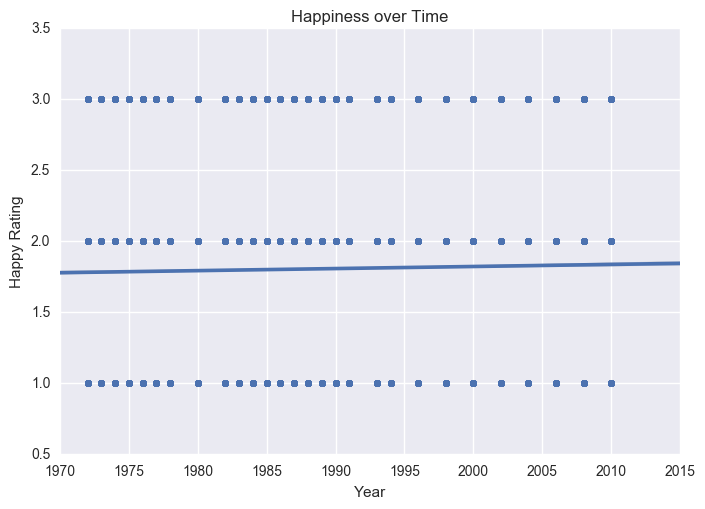

In [60]:
years = happy_data["YEAR"]
happiness = happy_data["HAPPY"]

sns.regplot(years, happiness)
plt.title("Happiness over Time")
plt.xlabel("Year")
plt.ylabel("Happy Rating")
plt.xlim(1970, 2015)
plt.show()

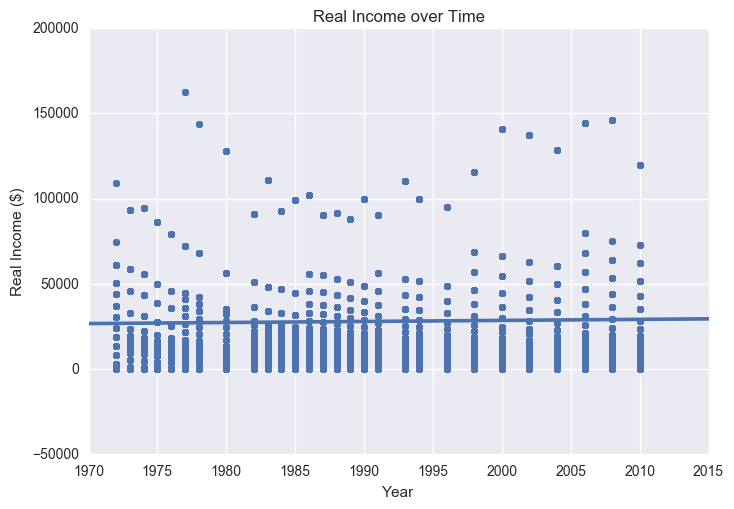

In [61]:
realinc = happy_data["REALINC"]
happiness = happy_data["HAPPY"]

sns.regplot(years, realinc)
plt.title("Real Income over Time")
plt.xlabel("Year")
plt.ylabel("Real Income ($)")
plt.xlim(1970, 2015)
plt.show()

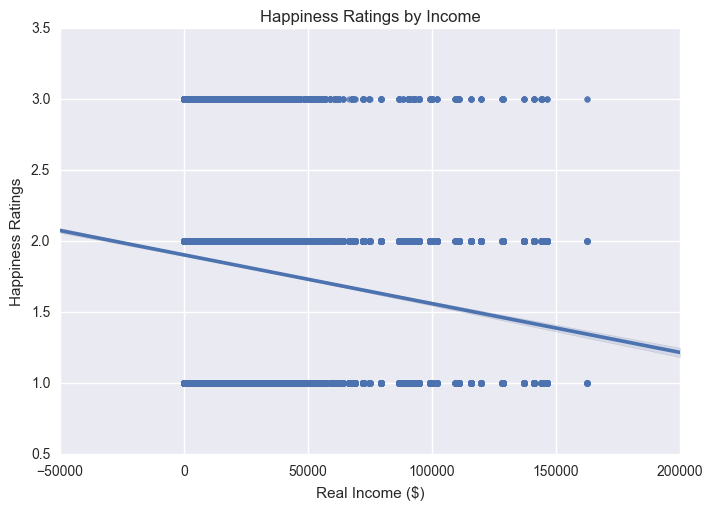

In [62]:
sns.regplot(realinc, happiness)
plt.title("Happiness Ratings by Income")
plt.xlabel("Real Income ($)")
plt.ylabel("Happiness Ratings")
plt.show()

While it is always good to get a sense of how the data is distributed visually, we cannot gain much insight right away, until we perform the regressions. 

We'll make a dictionary to collect the region names that are mapped to integers:

In [63]:
regions = {1: "New england",
           2: "Middle atlantic",
           3: "E. nor. central",
           4: "W. nor. central",
           5: "South atlantic",
           6: "E. sou. central",
           7: "W. sou. central",
           8: "Mountain",
           9: "Pacific"}

Now we can loop through each region and `print` the mean for `HAPPY` and `REALINC`:

In [32]:
for i in range(min(happy_data['REGION']), max(happy_data['REGION'] + 1)):
    print("Region " + regions[i])
    print(happy_data[happy_data['REGION'] == i][['HAPPY', 'REALINC']].mean())
    print()

Region New england
HAPPY          1.774452
REALINC    34595.970911
dtype: float64

Region Middle atlantic
HAPPY          1.855819
REALINC    29592.759566
dtype: float64

Region E. nor. central
HAPPY          1.814901
REALINC    28273.935576
dtype: float64

Region W. nor. central
HAPPY          1.769556
REALINC    26380.903013
dtype: float64

Region South atlantic
HAPPY          1.794130
REALINC    26295.332463
dtype: float64

Region E. sou. central
HAPPY          1.775000
REALINC    21203.774699
dtype: float64

Region W. sou. central
HAPPY          1.806218
REALINC    24825.085818
dtype: float64

Region Mountain
HAPPY          1.796753
REALINC    27904.925938
dtype: float64

Region Pacific
HAPPY          1.819434
REALINC    32071.195239
dtype: float64



Before we estimate the regression we will change the remaining `HAPPY` values that aren't "very happy" to 0:

In [33]:
happy_data.loc[happy_data["HAPPY"] > 1, 'HAPPY'] = 0
happy_data

,CASEID,YEAR,REGION,HAPPY,REALINC
0,1,1972,3,0,18951
1,2,1972,3,0,24366
2,3,1972,3,0,24366
3,4,1972,3,0,30458
4,5,1972,3,0,50763
5,6,1972,3,0,43994
6,7,1972,3,0,37226
7,8,1972,3,0,13537
8,9,1972,7,0,2707
9,10,1972,7,0,18951


Now we can estimate:

 $\mbox{HAPPY}_i= \alpha + \beta\log(\mbox{REALINC}) + \epsilon_i$

In [34]:
mod = smf.ols(formula='HAPPY ~ np.log(REALINC + .0001)', data=happy_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  HAPPY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.877
Date:                Sat, 23 Sep 2017   Prob (F-statistic):             0.0490
Time:                        21:36:19   Log-Likelihood:                -32903.
No. Observations:               50357   AIC:                         6.581e+04
Df Residuals:                   50355   BIC:                         6.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [35]:
mod = smf.ols(formula='HAPPY ~ np.log(REALINC + .0001) + C(REGION)', data=happy_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  HAPPY   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.408
Date:                Sat, 23 Sep 2017   Prob (F-statistic):           6.94e-11
Time:                        21:36:20   Log-Likelihood:                -32872.
No. Observations:               50357   AIC:                         6.576e+04
Df Residuals:                   50347   BIC:                         6.585e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 